In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings


In [2]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [89]:
new_var = { "Gender" : {"Male": 1, "Female": 0 }}
marr = { "Married" : { "Yes" : 1, "No": 0}}
grad = { "Education" : {"Graduate" : 1, "Not Graduate" : 0}}
emp = {"Self_Employed" : { "Yes": 1 , "No" : 0}}
loan_status = { "Loan_Status" : {"Y" : 1, "N" : 0}}
dep = {"Dependents" : { "3+" : 4}}


In [90]:
df.replace(dep,inplace=True)



In [23]:
df['Gender'].value_counts()

1.0    489
0.0    112
Name: Gender, dtype: int64

In [43]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [46]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [47]:
df.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents            object
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null float64
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 62.4+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [52]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

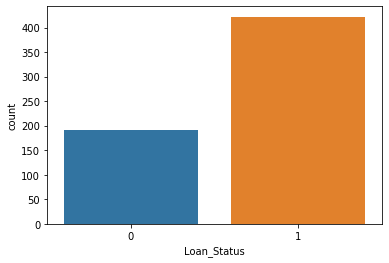

In [48]:
sns.countplot(df['Loan_Status'])

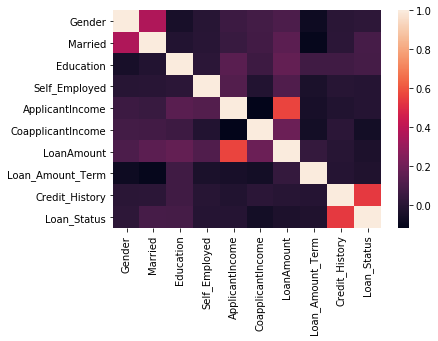

In [170]:
sns.heatmap(df.corr())

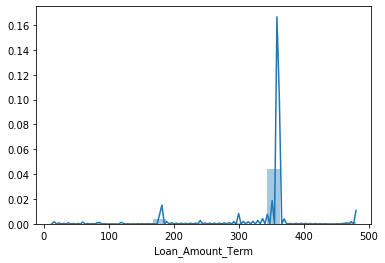

In [73]:
sns.distplot(df['Loan_Amount_Term'])

In [91]:
df['Dependents'].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [62]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [55]:
df['Gender'].value_counts()

1.0    502
0.0    112
Name: Gender, dtype: int64

In [114]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [115]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [116]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [117]:
y = df.iloc[:, -1]
x = df.iloc[:, 1:11]

In [118]:
x['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [119]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

C:\Users\Akshay Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
predictions = logisticRegr.predict(X_test)

In [168]:
score = logisticRegr.score(X_test, y_test)
print(score*100,'%')

79.80295566502463 %


### Random-forset

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [169]:
clf = RandomForestClassifier(n_estimators=100,max_depth=5, random_state=10)
clf.fit(X_train,y_train)
score = clf.score(X_test, y_test)
print(score*100,'%')
    


80.29556650246306 %


### SVM 

In [171]:
from sklearn import svm

In [181]:
clf = svm.SVC(gamma='scale',random_state=100)

In [182]:
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=100, shrinking=True, tol=0.001,
    verbose=False)

In [183]:
score = clf.score(X_test,y_test)

In [184]:
print(score*100,'%')

64.5320197044335 %


### KNN

In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [216]:
neigh = KNeighborsClassifier( n_neighbors=9)

In [217]:
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [218]:
score = neigh.score(X_test,y_test)

In [219]:
print(score*100,'%')

62.5615763546798 %
